In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ***** CASO DE TESTE 1 - caso ótimo *****

# atraso mínimo = 50 ms
# atraso máximo = 100 ms
# atraso de buffer = 10.000 ms (10s)
# atraso de rebuferização = 8.000 ms (8s)
# perda de pacotes

filename =  "packetsTimesData\\7.csv"
df = pd.read_csv(filename)

df

,packetSequenceNumber,scheduledPlayoutTimeMillis,arrivalTimeMillis
0,0,1733324332638,1733324322655
1,1,1733324332658,1733324322698
2,2,1733324332678,1733324322746
3,3,1733324332698,1733324322789
4,4,1733324332718,1733324322819
...,...,...,...
496,496,1733324366558,1733324364209
497,497,1733324366578,1733324364242
498,498,1733324366598,1733324364273
499,499,1733324366618,1733324364305


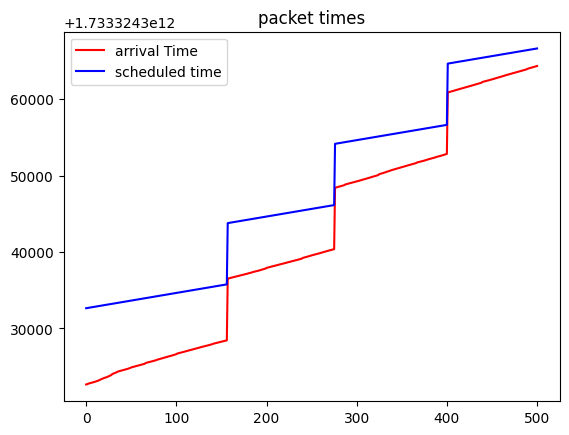

In [4]:
scheduled_times = list(df["scheduledPlayoutTimeMillis"])
arival_times = list(df["arrivalTimeMillis"])
x = list(range(len(arival_times)))

plt.title("packet times")
plt.plot(x, arival_times, label="arrival Time", color="red")
plt.plot(x, scheduled_times, label="scheduled time", color="blue")
plt.legend()

plt.show()

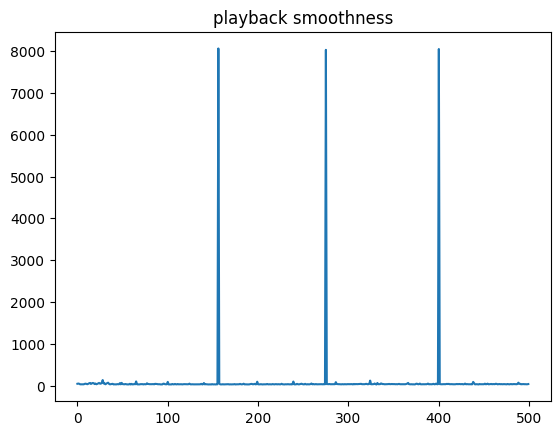

In [5]:
playback_smoothness = [arival_times[i] - arival_times[i-1] for i in range(1, len(arival_times))]
x = [i for i in range(len(playback_smoothness))]

plt.title("playback smoothness")
plt.plot(x, playback_smoothness)
plt.show()

In [6]:
df2 = pd.read_csv("data.csv")
df2

,minNetworkDelayMillis,maxNetworkDelayMillis,playoutBufferDelayMillis,packetConsumeTimeMillis,rebufferingDelayMillis,discartProbPercent,timeMillis,timeRebufferingMillis,numTimesRebuffer,numConsumedPackets,numLatePackets,numOutOfOrderPackets,numLostPackets
0,50,100,10000,20,8000,0,51780,24000,3,501,0,0,0


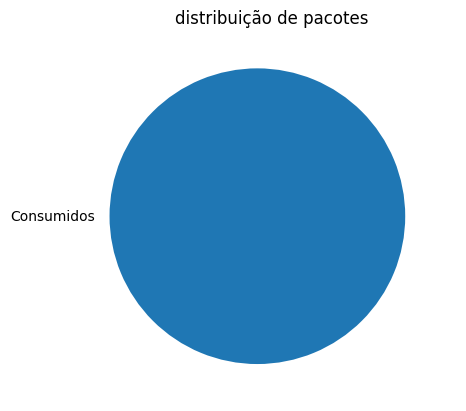

In [17]:
last_line = df2.shape[0] - 1
consumed = df2.loc[last_line, "numConsumedPackets"]
late = df2.loc[last_line, "numLatePackets"]
unordered = df2.loc[last_line, "numOutOfOrderPackets"]
lost = df2.loc[last_line, "numLostPackets"]

labels = ["Consumidos", "atrasados", "fora de ordem", "perdidos"]
colors = ["green", "red", "yellow", "black"]
sizes = [consumed, late, unordered, lost]
explode = (0.1, 0.1, 0, 0)

for i, (size, label, color) in enumerate(zip(sizes, labels, colors)):
    if size == 0:
        labels[i] = ""
        

plt.title("distribuição de pacotes")
plt.pie(sizes, labels=labels, explode=explode)
plt.show()